[  0   3 172 173]
[0]


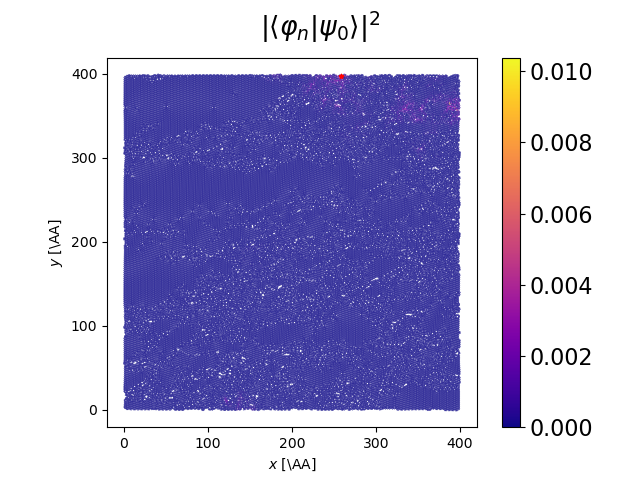

[ 7  8  9 10 11 12 13]


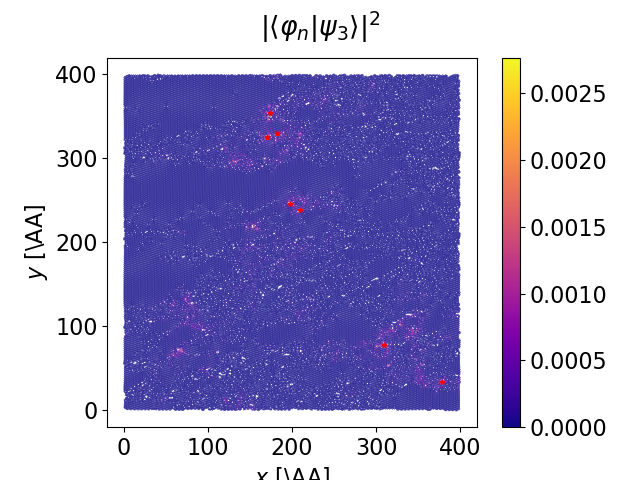

[477 478 479]


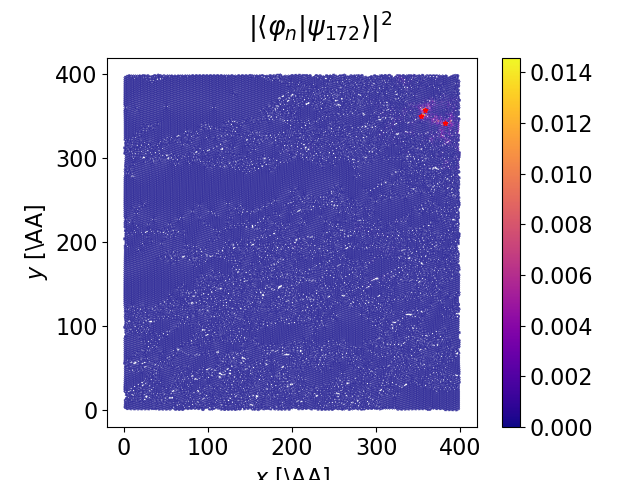

[480 481]


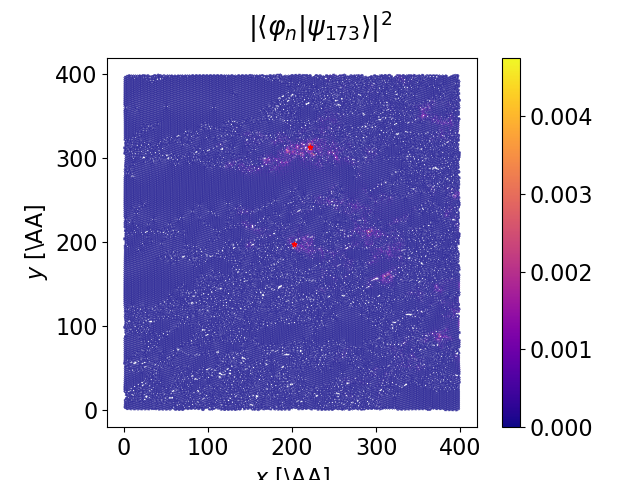

In [1]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from qcnico.qcplots import plot_atoms, plot_MO
from qcnico.coords_io import read_xsf

nsample = 127

percdir = f'/Users/nico/Desktop/simulation_outputs/percolation/Ata_structures/tempdot6/percolate_output/zero_field/virt_100x100_gridMOs/sample-{nsample}/'
Mdir = '/Users/nico/Desktop/simulation_outputs/percolation/Ata_structures/tempdot6/MOs_ARPACK/virtual/'
posdir = '/Users/nico/Desktop/simulation_outputs/MAC_structures/Ata_structures/tempdot6/relaxed/'

MO_inds = [0,3,-2,-1]

cc = np.load(percdir + 'cc.npy')
ii = np.load(percdir + 'ii.npy')
M = np.load(Mdir + f'MOs_ARPACK_bigMAC-{nsample}.npy') 
pos,_ = read_xsf(posdir + f'tempdot6n{nsample}_relaxed.xsf')

MO_inds = np.unique(ii)[MO_inds]
print(MO_inds)

for n in MO_inds:
    site_inds = (ii == n).nonzero()[0]
    print(site_inds)
    sites = cc[site_inds]
    
    fig,ax = plt.subplots()

    fig, ax = plot_MO(pos,M,n,dotsize=0.1,show=False,plt_objs=(fig,ax),usetex=False)
    ax.scatter(sites[:,0],sites[:,1],marker='*',color='r',s=10)
    plt.show()


cc_clrs =  ['#1f77b4']
cluster_clrs =  ['#1f77b4']


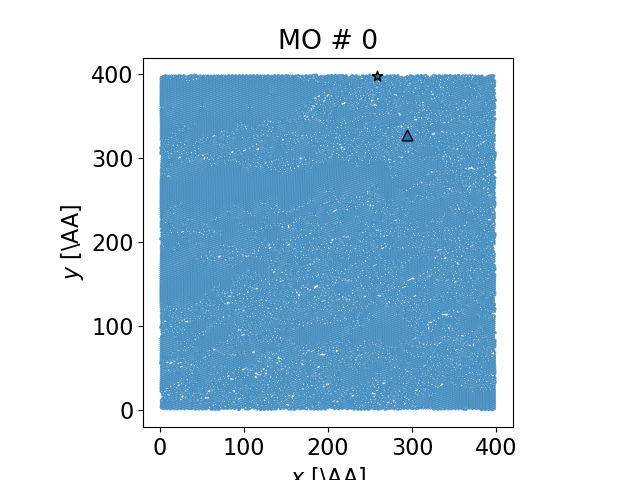

cc_clrs =  ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
cluster_clrs =  ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']


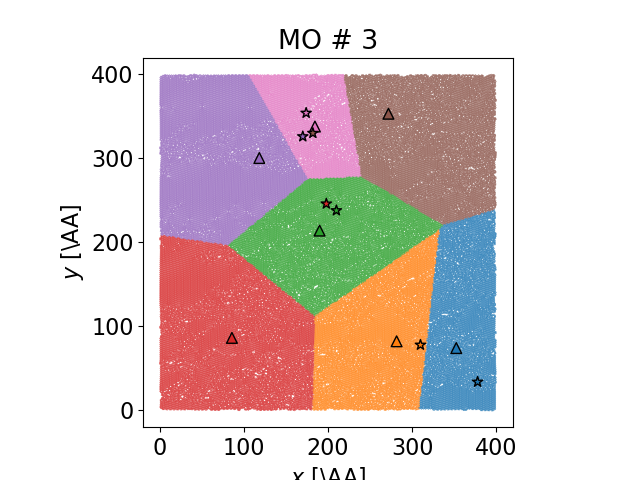

cc_clrs =  ['#1f77b4', '#ff7f0e', '#2ca02c']
cluster_clrs =  ['#1f77b4', '#ff7f0e', '#2ca02c']


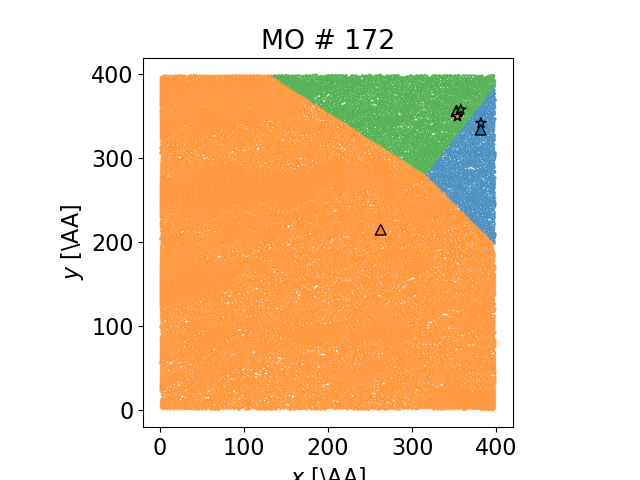

cc_clrs =  ['#1f77b4', '#ff7f0e']
cluster_clrs =  ['#1f77b4', '#ff7f0e']


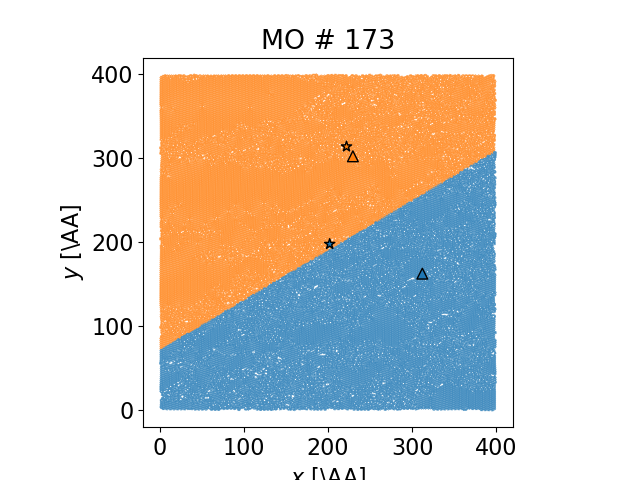

In [12]:
from MOs2sites import assign_AOs
from matplotlib import rcParams

cyc = rcParams['axes.prop_cycle'] #default plot colours are stored in this `cycler` type object

pos = pos[:,:2]

for n in MO_inds:
    site_inds = (ii == n).nonzero()[0]
    nsites  = site_inds.shape[0]
    sites = cc[site_inds]
    colors = [d['color'] for d in list(cyc[0:nsites])]
    psi = M[:,n]

    cluster_centers,labels = assign_AOs(pos,sites,psi=psi)

    atom_clrs  = [colors[k] for k in labels]
    cluster_clrs = colors
    cc_clrs = colors
    
    print('cc_clrs = ',cc_clrs)
    print('cluster_clrs = ',cluster_clrs)
    
    fig,ax = plt.subplots()

    fig, ax = plot_atoms(pos,dotsize=0.1,show=False,plt_objs=(fig,ax),usetex=False,colour=atom_clrs,zorder=1)
    ax.scatter(*cluster_centers.T,marker='^',c=cluster_clrs,edgecolors='k',s=60.0,zorder=2)
    ax.scatter(*sites.T,marker='*',c=cc_clrs,edgecolors='k',s=60.0,zorder=3)
    ax.set_title(f'MO # {n}')
    plt.show()


In [3]:
pos.shape

(60825, 3)